# <a class="anchor" id="0"></a>
# Deep Learning and ANN Assignment1
# Student ID/Name - 2020AIML003 / Sudheendran T L

---
<a class="anchor" id="0"></a>
# **Table of Contents**

[Install Packages and Import Libraries](#1)  
[Data Preprocessing](#2)  

[Q1 Train a Perceptron](#Q1)  
>Q1.1  [Implement the perceptron training rule and get the appropriate parameters for a single perceptron - 2 Marks](#Q1.1)  
>Q1.2  [Plot the data points and the obtained decision boundary - 2 Marks](#Q1.2)  
>Q1.3  [Draw the schematic diagram of the trained perceptron with learned weights - 1 Mark](#Q1.3)  


[Q2 Train a Neural Network](#Q2)  
>Q2.1  [Implement a single hidden layer MLP. Final output layer will have 3 neurons,one for each result. Arch: [Input, hidden, output] - 2 Marks](#Q2.1)  
>Q2.2 (i)  [Use keras or any other framework to design the NN model and train on the iris data - 3 Marks](#Q2.2.i)  
>Q2.2 (ii)  [Draw the schematic diagram of the NN along with all the weights and specify a suitable activation function. How many trainable parameters are there? - 2 Marks](#Q2.2.ii)  

[References](#3)  

---

## **Install Packages and Import Libraries** <a class="anchor" id="1"></a>

In [1]:
#!pip install tensorflow

In [2]:
#!pip install keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings("ignore")

[Go To Section Beginning](#1)    
[Go To Top](#0)

## **Data Preprocessing** <a class="anchor" id="2"></a>

In [4]:
# construct the input data provided in the assignment image
X1 = [-3.98,-3.464,-3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
X2 = [-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
Y = [1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]

In [5]:
# create a dataframe with the input/target variables
df = pd.DataFrame ({'X1':  X1, 'X2': X2, 'Y': Y })
df.head()

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0


In [6]:
# inspect dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      25 non-null     float64
 1   X2      25 non-null     float64
 2   Y       25 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 728.0 bytes


<AxesSubplot:>

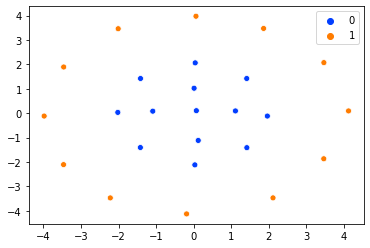

In [7]:
# visualise the relationship between the input/target variables
sns.scatterplot(x=X1, y=X2, hue=Y, palette='bright', data=df)

[Go To Section Beginning](#2)  
[Go To Install Packages and Import Libraries Section](#1)  
[Go To Top](#0)

## **Q1 Train a Perceptron** <a class="anchor" id="Q1"></a>

### **Q1.1 Implement the perceptron training rule and get the appropriate parameters for a single perceptron - 2 Marks** <a class="anchor" id="Q1.1"></a>

In [8]:
class Perceptron(object):
    """
    Description
    -----------
    The Perceptron class, implementing the pereceptron rule/algorithm from scratch
    
    Parameters
    ----------
    learning_rate : float, optional
        The learning rate that will be applied in the gradient descent step

    n_iter : int, optional
        The number of iterations the gradient descent is to be iterated for

    random_state : int, optional
        The value to initialize the random_state variable used as input in generating initial rand weights

    Methods / Functions
    --------------------
    
    __init__ - The constructor method of this class; class variables are set based on input/default values. 
    
    fit      - The fit method implements the core alogrithm / training rule and learns the weights based on the input

               Takes as input two mandatory parameters X, y
    
               X - the ndarray of input variables
    
               y - the 1D array of target variable
    
    predict  - Based on the weights created, this method predicts the output for any given input

               Takes as input X, the ndarray of input variables and returns the predict output as a 1D array

    Usage Examples:
    ---------------
    Example 1: Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
    Example 2: Perceptron(n_iter=100, random_state=1)
    Example 3: Perceptron(random_state=1)
    Example 4: Perceptron()

    """
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        # Set the learning rate, iterations and random state variables to the values 
        # provided in the input or to default values, in case input is not provided
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # Based on the random_state variable create a rand number
        rand = np.random.RandomState(self.random_state)
        
        # Create weights array, that are normally distributed, of the size of the # of columns in the input  
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])

        # As we start off, create an empty list that records errors through the iterations
        self.errors_ = []

        # Iterate as many items as specified in the input
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                # For every x in X, we calcuate the diff b/w the predicted and expected target
                # using the difference calculated, update the weights (increase/decrease) based
                # on the sign of the difference. In case the the difference is 0, the weights
                # are not altered. Whenever the difference is not 0, we increment the error count
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)

            # append the value of all errors encountered during the iterations
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        # apply the weights to the input variable X 
        # apply the unit step function as the activation function
        # and return the result
        return np.where((np.dot(X, self.weights[1:]) + self.weights[0])>= 0, 1, 0)

In [9]:
X = df [ [ "X1", "X2" ] ].to_numpy()
y = df [ 'Y' ].to_numpy()

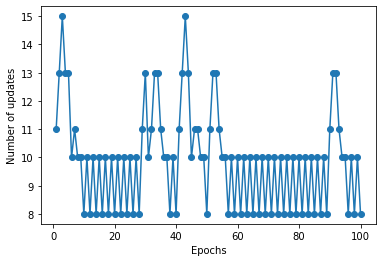

In [10]:
# create and object of the Perceptron class
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)

# involve the fit method to learn the weights
per.fit(X, y)

# plot the errors obtained during the iterations, stored in the per.errors_ list variable
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [11]:
# display the weights calculated by our algorithm
# the weights are of the form - [w0, w1, w2] ( w0 is the bias weight, w1, w2 the weights of x1, x2 respectively)
per.weights

array([-0.18375655,  0.20108244, -0.17848172])

### **Q1.2 Plot the data points and the obtained decision boundary - 2 Marks** <a class="anchor" id="Q1.2"></a>

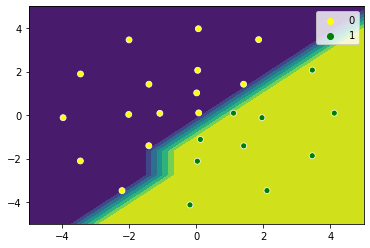

In [12]:
# plot the decision boundary
xx = np.linspace(-5, 5, 10)
yy = np.linspace(-5, 5, 10)
xx, yy = np.meshgrid(xx, yy)
z = per.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
h = plt.contourf(xx, yy, z)
yy = per.predict(X)
yy = list(yy)
#yy = [1 if yy[i] == Y[i] else 0 for i in range (len(X1))]
sns.scatterplot(x=X1, y=X2, hue=yy, palette=['yellow','green'], data=df)
plt.show()

### **Q1.3 Draw the schematic diagram of the trained perceptron with learned weights - 1 Mark** <a class="anchor" id="Q1.3"></a>

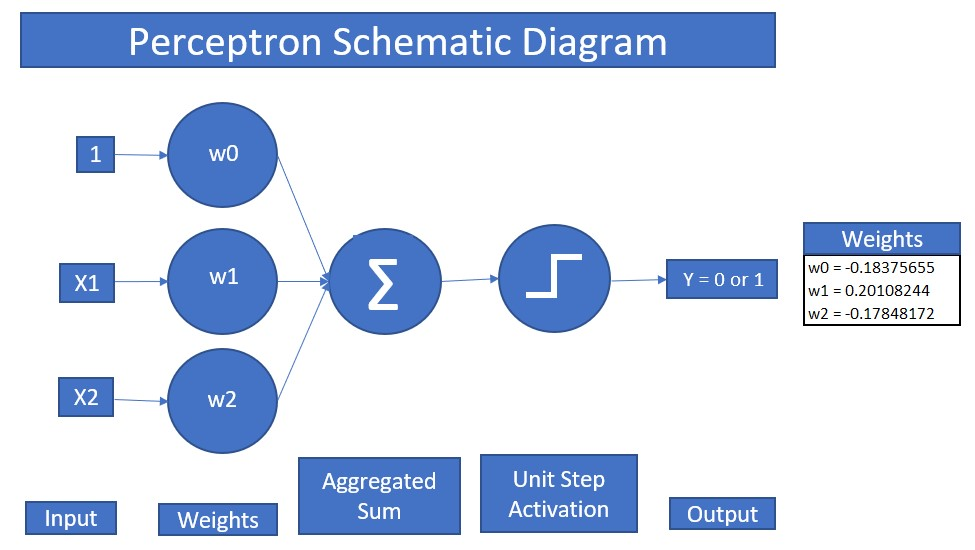

[Go To Section Beginning](#Q1)  
[Go To Data Preprocessing Section](#2)  
[Go To Install Packages and Import Libraries Section](#1)  
[Go To Top](#0)

## **Q2 Train a Neural Network** <a class="anchor" id="Q2"></a>

In [13]:
# read the iris dataset
df = pd.read_csv ("iris.data.csv", names=['sepal length', 'sepal width', 'petal length', 'petal width','class'], header=None)

In [14]:
# display/inspect the read dataframe for correctness
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Seperate the input and target variables
X = df [ [ "sepal length", "sepal width", "petal length", "petal width" ] ]

# Encode the target variables using the built-in Factorize method
y, _ = pd.factorize ( df [ 'class' ] )

In [16]:
# Split the input data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

### **Q2.1 Implement a single hidden layer MLP. Final output layer will have 3 neurons,one for each result. Arch: [Input, hidden, output] - 2 Marks** <a class="anchor" id="Q2.1"></a>

In [17]:
# as per the assignment requirement, create a single layer, 3-output node MLP classifier
# we however, set the #of nodes to 32 in the only hidden layer
# and fit the MLP classifier to train on the data
mlp = MLPClassifier(hidden_layer_sizes=(32), random_state=1, max_iter=300).fit(X_train, y_train)

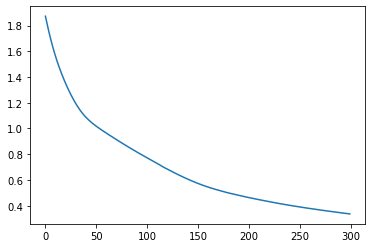

In [18]:
# display the loss curve encountered during the MLP interations
# We see a nice declining trend and then flattening out
# of the training/test losses after few 100s of iterations
plt.plot(mlp.loss_curve_)

In [19]:
# display the coefficients the MLP classifier has arrived at
mlp.coefs_

[array([[-1.08980288e-01,  2.15968159e-01, -1.81831229e-01,
         -7.23851136e-02, -3.37507808e-01, -1.21573671e-01,
         -8.72074767e-02, -7.65188299e-03, -4.24865266e-04,
         -1.17952906e-01,  8.03295644e-02,  1.92815661e-01,
         -8.19653945e-02,  4.51554936e-01, -1.63480086e-01,
          1.77808390e-01, -8.39079265e-03,  2.91661773e-02,
         -9.26800391e-02, -6.12516340e-02,  3.27180258e-01,
          3.04656210e-01, -1.50477233e-02,  5.18038759e-02,
          3.13560033e-01,  2.60795105e-01, -1.26133498e-01,
         -3.89845868e-01, -7.61295209e-02,  2.54640670e-01,
         -1.17849462e-01,  9.67178360e-02],
        [ 3.31554216e-01,  1.61455755e-01,  1.65282233e-02,
         -6.49198996e-02,  5.44403414e-02,  7.85695901e-02,
         -2.44952895e-01,  3.72092456e-02,  4.74558000e-01,
          3.67073668e-02,  1.60978808e-01,  2.19099341e-01,
         -1.94851905e-01,  1.18527740e-01,  1.22155269e-01,
         -2.69101403e-01, -8.79884049e-02, -3.20137202e-

In [20]:
# display the # of layers in the MLP classifier created above
# we see that there are 3 layers - 1 input, 1 hidden and 1 output layers
mlp.n_layers_

3

In [21]:
# display the # of nodes in the output layer of the MLP classifier created
# we see that there are 3 nodes in the output layer
mlp.n_outputs_

3

In [22]:
# display the activation function used in final output layer by the MLP classifier 
# we see that the softmax activation function is used
mlp.out_activation_

'softmax'

In [23]:
# find the predicted output for the test data
y_pred = mlp.predict(X_test)

<AxesSubplot:>

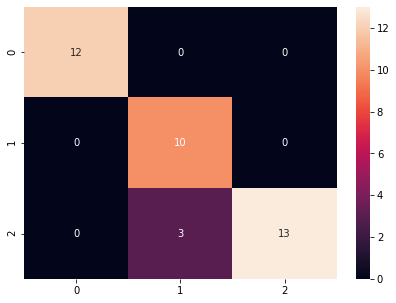

In [24]:
# Visualize the confusion matrix based on the MLP classifiers predictions
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)

In [25]:
# Print the accuracy score based on the MLP classifiers predictions
print("Accuracy of the MLP Classifier is: {:.2f}%".format(mlp.score(X_test, y_test)*100))

Accuracy of the MLP Classifier is: 92.11%


### **Q2.2 (i) Use keras or any other framework to design the NN model and train on the iris data - 3 Marks** <a class="anchor" id="Q2.2.i"></a>

In [26]:
# Create a keras Sequential engine NN model
# In this model, we create three hidden layers with 8, 4 and 4 nodes respectively and finally 1 output layer
# We will use the Retified Linear Unit (ReLU) activation function. Various activation functions 
# like tanh, sigmoid functions can be used as well
model = keras.Sequential([
    layers.Dense(8, activation='relu'), # First layer, with 8 neurons / output nodes
    layers.Dense(4, activation='relu'), # Second layer, with 4 neurons / output nodes
    layers.Dense(4, activation='relu'), # Third layer, with 4 neurons / output nodes
    layers.Dense(3),                    # Final layer, with 3 neurons / output nodes
])

In [27]:
# Lets use the 'adam' optimizer option and use 'mae' as the loss function to be used by the algorithm
# Various optimizers like SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl are available
# Various loss functions like mae, mse are available
model.compile(
    optimizer='adam',
    metrics='accuracy',
    loss='mae',
)

Minimum validation loss: 0.1075424998998642
Maximum validation accuracy: 0.8684210777282715


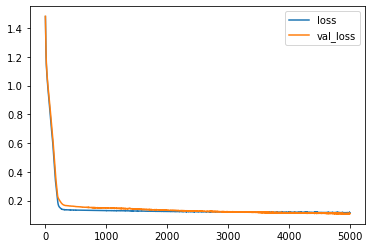

In [28]:
# Fit the model on the train data, using batch sizes, epochs that have been arrived
# based on several experiments done
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=5000,
    verbose = 0
)

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

# store the history of the losses and plot the same
# We see a nice declining trend and then flattening out
# of the training/test losses after few 100s/1000s of epochs
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

### **Q2.2 (ii) Draw the schematic diagram of the NN along with all the weights and specify a suitable activation function. How many trainable parameters are there? - 2 Marks** <a class="anchor" id="Q2.2.ii"></a>

In [29]:
# Get the weights determined by the NN for each of the 3 layers
first = model.layers[0].get_weights()[0]
second = model.layers[1].get_weights()[0]
third = model.layers[2].get_weights()[0]
final = model.layers[3].get_weights()[0]

# Print the weights determined by the NN for each of the 3 layers
print("First Layer Weights are: \n", first)
print("Second Layer Weights are: \n", second)
print("Third Layer Weights are: \n", third)
print("Final Layer Weights are: \n", final)

First Layer Weights are: 
 [[ 0.3526307  -0.24596816  0.4363862  -0.29499134  0.33742687 -0.5301608
   0.36909148 -0.49768806]
 [-0.81592005  0.20560682  0.30262882  0.191383    0.12621412  0.3828016
   0.6617156   0.0276553 ]
 [ 0.28995833 -0.0595926   0.02890884  0.49447665  0.08844637 -0.48402384
  -0.15822737  0.33396646]
 [ 0.5362517  -0.01899678  1.016939   -0.09058225 -0.41159496 -0.4777308
  -0.93960285  0.9187326 ]]
Second Layer Weights are: 
 [[ 0.61949795 -0.04887752  0.34046     0.49058276]
 [-0.20315254  0.14252561  0.43639475  0.61299103]
 [ 0.396978    0.5027195  -0.3828935  -0.54453254]
 [ 0.42406902  0.8349371  -0.5090117  -0.4584328 ]
 [-0.23856907 -0.92275417 -0.20814371 -0.37044466]
 [-0.6374778  -0.12967455  0.6021021   0.17717403]
 [-0.91071916 -0.38941148 -0.03722173 -0.14835507]
 [-0.8385661  -1.1535027  -0.6862783  -0.00652164]]
Third Layer Weights are: 
 [[ 0.249734   -0.5948331   0.603382    0.42127   ]
 [ 0.7637029   0.14667884  0.8334893  -0.8643804 ]
 [ 0.

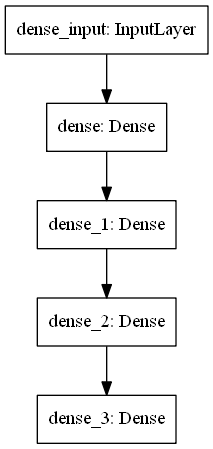

In [30]:
# Plot the layers in the model and draw the schematic diagram 
keras.utils.plot_model(model)

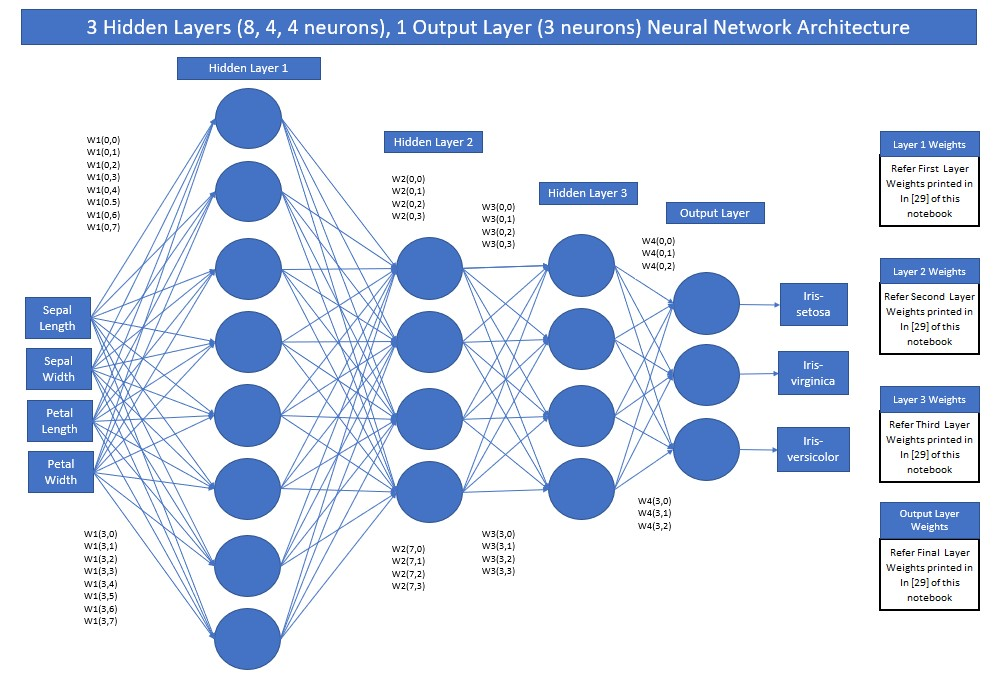

#### In the above model, we have used the ReLU activation for the hidden layers

In [31]:
# Display the summary of the sequential NN model - # of layers, # of total parameters, #of trainable parameters etc
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


#### We see that there are 111 trainable parameters in the NN modeled above!

[Go To Section Beginning](#Q2)  
[Go To Train a Perceptron Section](#Q1)  
[Go To Data Preprocessing Section](#2)  
[Go To Install Packages and Import Libraries Section](#1)  
[Go To Top](#0)

## **References** <a class="anchor" id="3"></a>

1) https://archive.ics.uci.edu/ml/datasets/iris

2) https://bits-pilani.instructure.com/courses/988/assignments/4582

3) https://bits-pilani.instructure.com/courses/988/files/181733?wrap=1

4) https://blockgeni.com/implementing-perceptron-algorithm-in-python/

5) https://keras.io/api/losses/

6) https://keras.io/api/optimizers/

[Go To Train a Neural Network Section](#Q2)  
[Go To Train a Perceptron Section](#Q1)  
[Go To Data Preprocessing Section](#2)  
[Go To Install Packages and Import Libraries Section](#1)  
[Go To Top](#0)